In [54]:
# RESAMPLING

#ernesto@ernesto.net

# one bias is that is that feature is unbalanced, is the gender feature balanced ?

# in the follow bank dataset most answers are no and only few are yes

# https://colab.research.google.com/drive/1gUDlZCUmMGyAHuIJUv4-ESci7M8Tj6X-?usp=sharing

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load the dataset
bankData = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/bank-full.csv",sep=';')
bankData.head()
sns.heatmap()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


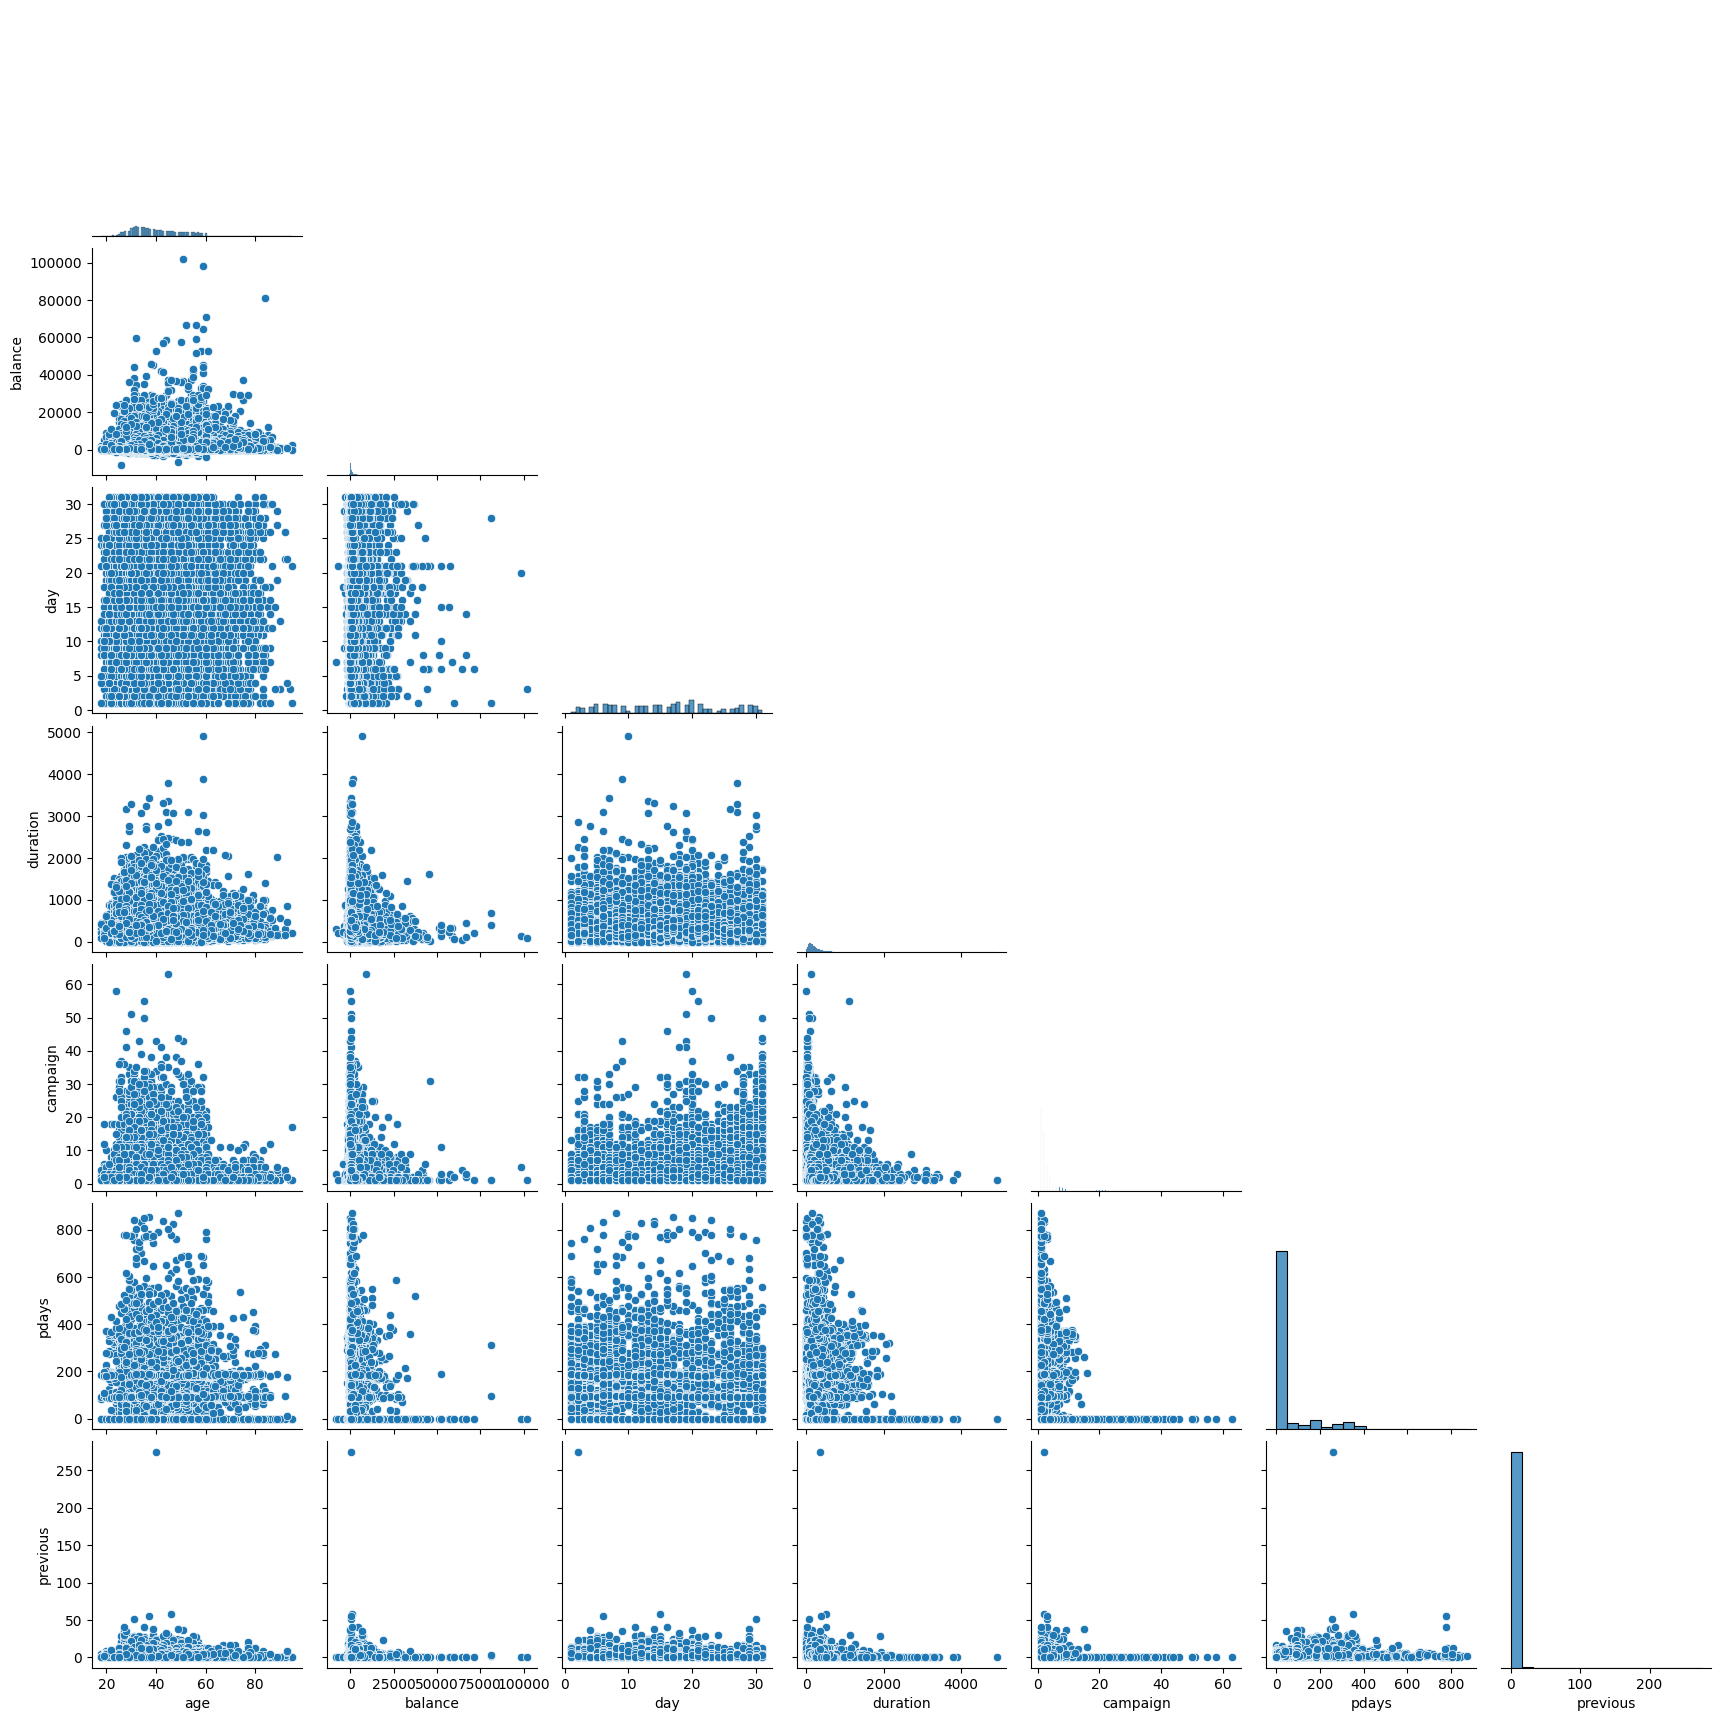

In [56]:
sns.pairplot(bankData,diag_kind='hist',markers=['o','s'],corner=True)

In [57]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [58]:
# Converting each of the columns to scaled version
bankData['ageScaled'] = rob_scaler.fit_transform(bankData['age'].values.reshape(-1,1))
bankData['balScaled'] = rob_scaler.fit_transform(bankData['balance'].values.reshape(-1,1))
bankData['durScaled'] = rob_scaler.fit_transform(bankData['duration'].values.reshape(-1,1))

In [59]:
# Dropping the original columns
bankData.drop(['age','balance','duration'], axis=1, inplace=True)

In [60]:
bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing','loan','contact','month','poutcome']])

In [61]:
bankCat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [62]:
bankNum = bankData[['ageScaled','balScaled','day','durScaled','campaign','pdays','previous']]

In [63]:
# Merging with the original data frame
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1.266667,1.250000,5,0.375000,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.333333,-0.308997,5,-0.134259,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,-0.400000,-0.328909,5,-0.481481,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.533333,0.780236,5,-0.407407,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.400000,-0.329646,5,0.083333,1,-1,0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
# Defining the LogisticRegression function
bankModel = LogisticRegression(max_iter=100)
bankModel.fit(X_train, y_train)

c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.90


In [67]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[11705   293]
 [ 1075   491]]
              precision    recall  f1-score   support

          no       0.92      0.98      0.94     11998
         yes       0.63      0.31      0.42      1566

    accuracy                           0.90     13564
   macro avg       0.77      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [68]:
print('Percentage of negative class :',(y_train[y_train=='yes'].value_counts()/len(y_train) ) * 100)
print('Percentage of positive class :',(y_train[y_train=='no'].value_counts()/len(y_train) ) * 100)

Percentage of negative class : yes    11.764148
Name: y, dtype: float64
Percentage of positive class : no    88.235852
Name: y, dtype: float64


In [69]:
#options to fix bias
# Collect more data
# Resample the data
# --- Undersample (make the dataset the same size as the minority class (11%))
# --- Oversample (create "fake" data points so that the minority class equals the majority class)
# --- Modified (take the majority and drop it in half and we take the minority and we increase to the halfway point)

In [70]:
# Option I : Random undersampling
# Let us first join the train_x and train_y for ease of operation
trainData=pd.concat([X_train,y_train],axis=1)

In [71]:
trainData.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
19100,1,0,0,0,0,0,0,0,0,0,...,0,1,0.800000,-0.162979,5,0.236111,1,-1,0,no
37958,1,0,0,0,0,0,0,0,0,0,...,0,0,0.733333,-0.238938,14,0.865741,2,289,19,no
12451,0,1,0,0,0,0,0,0,0,0,...,0,1,0.000000,0.385693,1,1.347222,3,-1,0,no
18263,0,0,0,0,1,0,0,0,0,0,...,0,1,1.333333,-0.330383,31,-0.592593,8,-1,0,no
5128,0,0,0,0,0,0,0,1,0,0,...,0,1,-0.466667,-0.142330,21,-0.435185,2,-1,0,no


In [72]:
# pull out all the 'yes' or minority values, create a filter on index
ind=trainData[trainData['y']=='yes'].index
print(len(ind))

3723


In [73]:
# separate the minority class
minData=trainData.loc[ind]
print(minData.shape)

(3723, 52)


In [74]:
# now the majority i.e. pull 3723 from majority
ind1 = trainData[trainData['y']=='no'].index
print(len(ind1))

27924


In [75]:
# Separate the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

(27924, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
19100,1,0,0,0,0,0,0,0,0,0,...,0,1,0.800000,-0.162979,5,0.236111,1,-1,0,no
37958,1,0,0,0,0,0,0,0,0,0,...,0,0,0.733333,-0.238938,14,0.865741,2,289,19,no
12451,0,1,0,0,0,0,0,0,0,0,...,0,1,0.000000,0.385693,1,1.347222,3,-1,0,no
18263,0,0,0,0,1,0,0,0,0,0,...,0,1,1.333333,-0.330383,31,-0.592593,8,-1,0,no
5128,0,0,0,0,0,0,0,1,0,0,...,0,1,-0.466667,-0.142330,21,-0.435185,2,-1,0,no


In [76]:
majSample=majData.sample(n=len(ind),random_state=123)

In [77]:
print(majSample.shape)
majSample.head()

(3723, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
17387,0,0,0,0,1,0,0,0,0,0,...,0,1,0.666667,0.752212,28,-0.425926,3,-1,0,no
34679,0,1,0,0,0,0,0,0,0,0,...,0,0,0.800000,0.086283,5,-0.106481,7,250,3,no
26572,1,0,0,0,0,0,0,0,0,0,...,0,1,0.466667,1.785398,20,-0.134259,2,-1,0,no
3280,0,0,0,0,0,1,0,0,0,0,...,0,1,1.200000,1.972714,15,-0.009259,1,-1,0,no
4434,0,0,0,0,1,0,0,0,0,0,...,0,1,-0.133333,2.011062,20,-0.055556,1,-1,0,no


In [78]:
# Concatenating both data sets and then shuffling the data set
balData = pd.concat([minData,majSample],axis = 0)

In [79]:
# Shuffling the data set (This is optional)
from sklearn.utils import shuffle
balData = shuffle(balData)
balData.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
17237,0,0,0,0,0,0,0,1,0,0,...,0,1,0.000000,-0.114307,28,-0.148148,2,-1,0,no
44265,0,0,0,0,1,0,0,0,0,0,...,1,0,-0.200000,-0.180678,23,1.981481,3,179,2,yes
43802,0,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,-0.134956,27,-0.402778,1,555,2,yes
29795,0,0,0,0,0,0,0,0,0,1,...,0,1,-0.400000,-0.330383,4,-0.120370,2,-1,0,no
44809,0,0,0,0,0,0,0,0,0,1,...,1,0,0.666667,0.459440,16,0.208333,1,91,1,yes


In [80]:
# Making the new X_train and y_train
X_trainNew = balData.iloc[:,0:51]
print(X_trainNew.head())
y_trainNew = balData['y']
print(y_trainNew.head())

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
17237           0                0                 0              0   
44265           0                0                 0              0   
43802           0                0                 0              0   
29795           0                0                 0              0   
44809           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
17237               0            0                  0             1   
44265               1            0                  0             0   
43802               0            0                  0             0   
29795               0            0                  0             0   
44809               0            0                  0             0   

       job_student  job_technician  ...  poutcome_other  poutcome_success  \
17237            0               0  ...               0              

In [81]:
from sklearn.linear_model import LogisticRegression
bankModel1 = LogisticRegression()
bankModel1.fit(X_trainNew, y_trainNew)

c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
pred = bankModel1.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set for balanced data set: {:.2f}'.format(bankModel1.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set for balanced data set: 0.83


In [83]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[9969 2029]
 [ 278 1288]]
              precision    recall  f1-score   support

          no       0.97      0.83      0.90     11998
         yes       0.39      0.82      0.53      1566

    accuracy                           0.83     13564
   macro avg       0.68      0.83      0.71     13564
weighted avg       0.91      0.83      0.85     13564



In [84]:
# compare this confusion matrix with the earlier confusion matrix
# the value of model has increased although the accuracy has decreased
# this means we are going to get lot of people but we will talk to more people who are not going to purchase

In [85]:
# Oversampling
# !pip install smote-variants

In [86]:
# Shape before oversampling
print("Before OverSampling count of yes: {}".format(sum(y_train=='yes')))
print("Before OverSampling count of no: {} \n".format(sum(y_train=='no')))

Before OverSampling count of yes: 3723
Before OverSampling count of no: 27924 



In [87]:
import smote_variants as sv
import numpy as np

In [88]:
# Instantiating the SMOTE class
oversampler= sv.SMOTE()

In [89]:
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

2023-04-03 14:03:24,581:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-04-03 14:03:24,609:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-04-03 14:03:24,612:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-04-03 14:03:24,920:INFO:SMOTE: simplex sampling with n_dim 2


In [90]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os=='yes')))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os=='no')))

After OverSampling, the shape of train_X: (55848, 51)
After OverSampling, the shape of train_y: (55848,) 

After OverSampling, counts of label 'Yes': 27924
After OverSampling, counts of label 'no': 27924


In [91]:
# Training the model with Logistic regression model
from sklearn.linear_model import LogisticRegression
bankModel2 = LogisticRegression()
bankModel2.fit(X_train_os, y_train_os)

c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
pred = bankModel2.predict(X_test)

c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [93]:
print('Accuracy of Logistic regression model prediction on test set for Smote balanced data set: {:.2f}'.format(bankModel2.score(X_test, y_test)))

c:\Users\John\Downloads\mle\.venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy of Logistic regression model prediction on test set for Smote balanced data set: 0.84


In [94]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[10210  1788]
 [  331  1235]]


Here's how you can read a classification report:

    Precision: Precision is the number of true positives divided by the number of true positives plus false positives. It measures how accurate the positive predictions are. In other words, it measures the proportion of positive predictions that are actually positive.

    Recall: Recall is the number of true positives divided by the number of true positives plus false negatives. It measures how well the model is able to identify positive cases. In other words, it measures the proportion of positive cases that are correctly identified.

    F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. The F1-score ranges from 0 to 1, where 1 is the best possible score.

    Support: Support is the number of observations in each class. It provides an indication of how many observations the model correctly classified.

    Accuracy: Accuracy is the number of correct predictions divided by the total number of predictions. It measures how well the model predicts the correct class.

To read a classification report, you need to look at the metrics for each class separately. You can see the metrics for each class in the rows of the classification report. The average values of the metrics across all classes are usually shown in the last row.